<a id="immod"></a>
## Modules and set up



[Back](#contents)

In [21]:
import numpy as np; import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
from yt.visualization.base_plot_types import get_multi_plot
import matplotlib.colorbar as cb
from matplotlib.colors import LogNorm
import math
import sympy as sp
import astropy.constants as c
import astropy.units as u
import scipy
mH = 2.34e-24    #effective mass per H nucleus

directory = 'C:/Users/YYX/Desktop/Tracers_LS_relation/Analysis'
#CO>CO4-3>C18O>pNH3>HCN>C18O4-3>N2H+
sp1_a = ['CO', 'CO_4_3', 'C18O', 'pNH3', 'HCN', 'C18O_4_3', 'N2H']
sp2_a = ['co', 'co_4_3', 'c18o', 'pnh3', 'hcn', 'c18o_4_3', 'n2h']
sp3_a = [r'CO 1$\to$0', r'CO 4$\to$3', r'C$^{18}$O 1$\to$0', r'NH$_3$', r'HCN', r'C$^{18}$O 4$\to$3', r'N$_2$H$^+$']
sp4_a = [r'CO', r'CO J=4$\to$3', r'C$^{18}$O', r'NH$_3$', r'HCN', r'C$^{18}$O J=4$\to$3', r'N$_2$H$^+$']
sp4_a = ['CO thin', 'CO J=4$\to$3 thin', 'C$^{18}$O thin', 'NH$_3$ thin', 'HCN thin', 
         'C$^{18}$O J=4$\to$3 thin', 'N$_2$H$^+$ thin']

In [12]:
from yt.units.yt_array import YTQuantity as q
pc = 3.0856e18
km = 1.e5
cm_to_pc = q(1.0/pc, 'pc/cm')
cm_to_km = q(1.0/km, 'km/cm')
kmspc_to_pers = q(km/pc, 'pc/km')
dvdr_unit = q(1.0, 'km/s/pc')

<a id="contents"></a>
# Contents:
***
[Modules](#immod)
---
***
[Load data](#load_data)
---
   - [Field list](#field_list) 
   - [Field properties](#field_prop)
   
   
***
[Integrated intensity map](#int_inten_map)
---
***

[Luminosity(mass)-weighted density distribution](#lum_weigh_dens_dis)
---
***

[Calculating phyiscal quantities](#calculate)
---
   - [Calculating mass-weighted mean opacity](#cal_opac)
   - [Calculating mass-weighted mean density](#cal_dens)
   - [Calculating emitting sizes](#cal_em_sizes) 
---
[Autocorrelation function](#ACF)
---
   - [3D ACF](#3d_acf) 
   - [1D ACF](#1d_acf) 
   - [Calculating emitting sizes](#cal_em_sizes) 
***

In [3]:
beta = '0.2'
time = '10'
prj_ori = 'z' # orientation

<a id="field_list"></a>
### Field list and properties
[Back](#contents)

In [4]:
exec(open("C:/Users/yyx/Desktop/Tracers_LS_relation/C12_DATA/ReadData.py").read())
print(dir(ds.fields))
for field in ds.fields.gas:
    print(field)
print('\n')
for field in ds.fields.index:
    print(field)
print('\n')
for field in ds.fields.stream:
    print(field)

reading data for C:/Users/YYX/Desktop/Tracers_LS_relation/C12_DATA/C12_Beta0.2_256_0010.h5


C:\Users\YYX\Anaconda3\lib\site-packages\h5py\_hl\dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)
yt : [INFO     ] 2020-07-22 01:29:17,750 Parameters: current_time              = 0.0
yt : [INFO     ] 2020-07-22 01:29:17,752 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2020-07-22 01:29:17,753 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-07-22 01:29:17,755 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-07-22 01:29:17,758 Parameters: cosmological_simulation   = 0.0


Computing plasma beta:
0.19992031289023268 g/(cm*gauss**2*s**2)
[1.72045595e-21 2.20668255e-21 2.65191869e-21 ... 1.74959415e-21
 2.24948056e-21 2.56416171e-21] g/cm**3
['gas', 'index', 'stream']
Alias Field for "('stream', 'density')" (gas, density): (units: g/cm**3)
Alias Field for "('stream', 'velocity_x')" (gas, velocity_x): (units: cm/s)
Alias Field for "('stream', 'velocity_y')" (gas, velocity_y): (units: cm/s)
Alias Field for "('stream', 'velocity_z')" (gas, velocity_z): (units: cm/s)
Alias Field for "('index', 'path_element_y')" (gas, path_element_y): (units: cm)
Alias Field for "('index', 'path_element_x')" (gas, path_element_x): (units: cm)
Alias Field for "('index', 'dy')" (gas, dy): (units: cm)
Alias Field for "('index', 'x')" (gas, x): (units: cm)
Alias Field for "('index', 'vertex_y')" (gas, vertex_y): (units: cm)
Alias Field for "('index', 'vertex_x')" (gas, vertex_x): (units: cm)
Alias Field for "('index', 'cell_volume')" (gas, cell_volume): (units: cm**3)
Alias Field f

## Exploration on the velocity structure

In [38]:
# the range of the velocity 
ad = ds.all_data()
ad.get_data()  
ad_vz = ad['velocity_z']
ad_vz = np.array(ad_vz)/km
np.percentile(ad_vz, [0.01,0.1,50,99.9,99.99])  # in km/s
ad_vz = ad_vz.reshape(256, 256, 256)

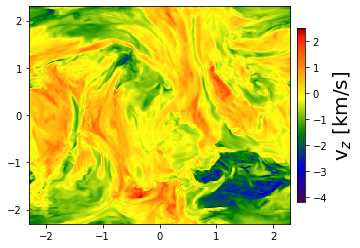

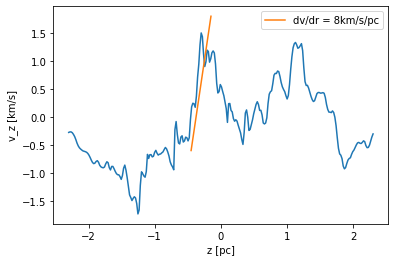

In [7]:
plt.figure(1)
plt.imshow(ad_vz[:,:,22], aspect='auto', origin='lower',
           cmap="bds_highcontrast",
           extent=(-2.3,2.3 ,-2.3 ,2.3 ))
cbar = plt.colorbar(shrink=0.8, aspect=20, fraction=.20,pad=.02)
cbar.set_label(r'v$_z$ [km/s]',size=20)
plt.savefig('v_z._slice_2.png')

plt.figure(2)
x = np.linspace(-2.3,2.3,256)
x2 = np.linspace(-0.45,-0.15,20)
plt.plot(x, ad_vz[:,222,222])
plt.plot(x2, 8*x2+3, label='dv/dr = 8km/s/pc')
plt.xlabel('z [pc]');plt.ylabel('v_z [km/s]')
plt.legend()

### LVG approximation

We adopt LVG approximation during our postprocessing.

We could see that we could not naively calculate the velocity gradient field using the yt's bulid in function 'add_gradient_field' because it is overlocalized and will give us systematically higher velocity gradient by a factor of about 8. Instead, we will calculate the velocity gradient by smoothing over some cells.  

In [4]:
# add velocity gradient field
ds.add_gradient_fields(('gas', 'velocity_magnitude'))
ad_dvdr = ad['velocity_magnitude_gradient_magnitude']
ad_dvdr = (np.array(ad_dvdr)/u.s).to(u.km/u.s/u.pc)
dvdr = ad_dvdr.reshape(256, 256, 256)

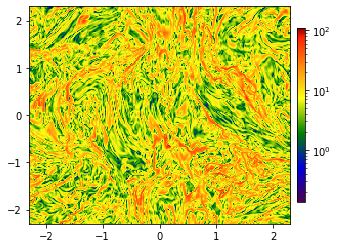

In [6]:
# we see that the generated velcity gradient is higher by a factor of 10. 
# Typical velocity gradient should be 1 km/s/pc.
plt.imshow(dvdr[:,:,0].value, aspect='auto', origin='lower',
           cmap="bds_highcontrast",norm=LogNorm(),
           extent=(-2.3,2.3 ,-2.3 ,2.3 ))
cbar = plt.colorbar(shrink=0.8, aspect=20, fraction=.20,pad=.02)

In [5]:
from scipy.interpolate import RegularGridInterpolator
def rebin(a, *args):
    '''rebin ndarray data into a smaller ndarray of the same rank whose dimensions
    are factors of the original dimensions. eg. An array with 6 columns and 4 rows
    can be reduced to have 6,3,2 or 1 columns and 4,2 or 1 rows.
    example usages:
    >>> a=rand(6,4); b=rebin(a,3,2)
    >>> a=rand(6); b=rebin(a,2)
    '''
    shape = a.shape
    lenShape = len(shape)
    factor = np.array(np.asarray(shape)/np.asarray(args), dtype=int)
    evList = ['a.reshape('] + \
             ['args[%d],factor[%d],'%(i,i) for i in range(lenShape)] + \
             [')'] + ['.mean(%d)'%(i+1) for i in range(lenShape)] 
    print(''.join(evList))
    return eval(''.join(evList))

  
# add velocity gradient by smoothing over 
res = 256
sm_fac = 8 # smooth factor
sm_res = int(res/sm_fac) # resolution of the smoothed cube         
v = np.array(ad['velocity_'+prj_ori].reshape(res,res,res)*cm_to_km) # in km/s 
x = np.array(ad['x']*cm_to_pc) # in pc
y = np.array(ad['y']*cm_to_pc) 
z = np.array(ad['z']*cm_to_pc) 
xx = np.array(x.reshape(res,res,res)[:,0,0]) # in pc
xx_sm = rebin(xx, sm_res)
yy = np.array(y.reshape(res,res,res)[0,:,0]) # in pc
yy_sm = rebin(xx, sm_res)
zz = np.array(z.reshape(res,res,res)[0,0,:]) # in pc
zz_sm = rebin(xx, sm_res)         
dl = ad['dx'][0]*cm_to_pc # in pc
dl_sm = sm_fac*dl 
if prj_ori=='x':
    v_sm = rebin(v, sm_res, res, res) 
    v_grad_sm = np.zeros(v_sm.shape)
    v_grad_sm[1:-1,:,:] = (v_sm[2:,:,:] - v_sm[:-2,:,:]) / (2*dl_sm) # in km/s/pc
    v_grad_sm[0,:,:] = (v_sm[1,:,:] - v_sm[-1,:,:]) / (2*dl_sm)
    v_grad_sm[-1,:,:] = (v_sm[0,:,:] - v_sm[-2,:,:]) / (2*dl_sm)
    vgrad_interp_func = RegularGridInterpolator((xx_sm, yy, zz), v_grad_sm, bounds_error=False, fill_value=None)
if prj_ori=='y':
    v_sm = rebin(v, res, sm_res, res) 
    v_grad_sm = np.zeros(v_sm.shape)
    v_grad_sm[:,1:-1,:] = (v_sm[:,2:,:] - v_sm[:,:-2,:]) / (2*dl_sm) # in km/s/pc
    v_grad_sm[:,0,:] = (v_sm[:,1,:] - v_sm[:,-1,:]) / (2*dl_sm)
    v_grad_sm[:,-1,:] = (v_sm[:,0,:] - v_sm[:,-2,:]) / (2*dl_sm)
    vgrad_interp_func = RegularGridInterpolator((xx, yy_sm, zz), v_grad_sm, bounds_error=False, fill_value=None)
if prj_ori=='z':
    v_sm = rebin(v, res, res, sm_res) 
    v_grad_sm = np.zeros(v_sm.shape)
    v_grad_sm[:,:,1:-1] = (v_sm[:,:,2:] - v_sm[:,:,:-2]) / (2*dl_sm) # in km/s/pc
    v_grad_sm[:,:,0] = (v_sm[:,:,1] - v_sm[:,:,-1]) / (2*dl_sm)
    v_grad_sm[:,:,-1] = (v_sm[:,:,0] - v_sm[:,:,-2]) / (2*dl_sm)
    vgrad_interp_func = RegularGridInterpolator((xx, yy, zz_sm), v_grad_sm, bounds_error=False, fill_value=None)
        
def _vgrad(field, data):
    x = np.ravel(data['x']*cm_to_pc) # in pc
    y = np.ravel(data['y']*cm_to_pc)
    z = np.ravel(data['z']*cm_to_pc) 
    grid = np.vstack((x, y, z)).T # array of the (x,y,z)
    vgrad = vgrad_interp_func( grid )
    vgrad = np.abs(vgrad)
    return vgrad.reshape(x.shape)*q(km/pc, '1/s')
    
ds.add_field(('gas','vgrad_%s'%prj_ori), function=_vgrad, units="1/s")
ds.periodicity = (True, True, True)

a.reshape(args[0],factor[0],).mean(1)
a.reshape(args[0],factor[0],).mean(1)
a.reshape(args[0],factor[0],).mean(1)
a.reshape(args[0],factor[0],args[1],factor[1],args[2],factor[2],).mean(1).mean(2).mean(3)


C:\Users\YYX\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'


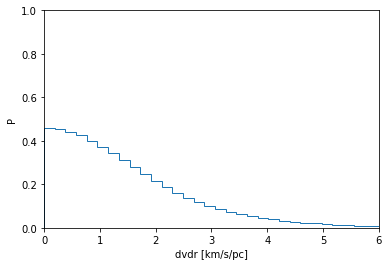

In [10]:
vgrad = ad['vgrad_%s'%prj_ori]*pc/km
plt.hist(np.abs(np.array(vgrad)), 80, histtype='step', density=1)
plt.axis([0, 6, 0, 1.])
plt.xlabel('dvdr [km/s/pc]')
plt.ylabel('P')
plt.savefig('dist_dvdr.png')

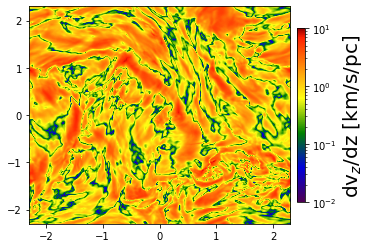

In [7]:
# we see that the generated velcity gradient is higher by a factor of 10. 
# Typical velocity gradient should be 1 km/s/pc.
plt.imshow(np.abs(vgrad.reshape(res,res,res)[:,:,30]), aspect='auto', origin='lower',
           cmap="bds_highcontrast",norm=LogNorm(),
           extent=(-2.3,2.3 ,-2.3 ,2.3 ), vmin=1e-2, vmax=1e1)
cbar = plt.colorbar(shrink=0.8, aspect=20, fraction=.20,pad=.02)
cbar.set_label(r'dv$_z$/dz [km/s/pc]',size=20)
plt.savefig('dvdr.png')

<a id="int_inten_map"></a>
# Integrated intensity map
[Back](#contents)

derivation of the unit change from erg/s to K km/s 

planck's law
\begin{equation}
B_{\nu}(T_B)=\frac{2 \nu^{2} k_{\mathrm{B}} T_B}{c^{2}}
\end{equation}

convert frequency to speed
\begin{equation}
\nu = \nu_0(1+\frac{v}{c})
\end{equation}

\begin{equation}
dv = \frac{c}{\nu_0} d\nu
\end{equation}

The power along los is

\begin{equation}
P = \int_{\rm los} \frac{dE}{dt} = \int \frac{dE}{dt d\nu} d\nu = C \cdot S \int T_B dv
\end{equation}

where $C = 8\pi \nu_0^3 k_B/c^2 = 8 \pi k_B c/\lambda_0^3$ is a constant factor

So we get
\begin{equation}
\int T_B dv = \frac{P}{C \cdot S} = \frac{Conv P}{S} 
\end{equation}
where $Conv = \lambda_0^3/8 \pi k_B c$ is the conversion factor.

In [20]:
### Add luminosity field and prepare for the data for intensity map and density PDF

p0 = yt.ProjectionPlot(ds,'z','density')
p0.set_log("density", True) 
p0_frb = p0.data_source.to_frb((4.6, "pc"), 256)
dens = np.array(p0_frb['density'])/mH
r0=10**np.average(np.log10(dens))

L = 1.70665264e+50**(1/3)/3.0856e18 # length of a single pixel in pc
for i, sp1, sp2, sp3 in zip(range(len(sp1_a)), sp1_a, sp2_a, sp3_a):
    ip = i+1
    exec(open("C:/Users/yyx/Desktop/Tracers_LS_relation/DESPOTIC/molecule/lum_field.py").read())
    ad = ds.all_data()
    locals()['%s_lum'%sp1] = ad['%s_Luminosity'%sp1]
    p = yt.ProjectionPlot(ds,'z', '%s_Luminosity'%sp1, method='sum')
    p.set_log("%s_Luminosity"%sp1, True)
    p_frb = p.data_source.to_frb((4.6, "pc"), 256)
    locals()[sp2] = np.array(p_frb['%s_Luminosity'%sp1])*eval('conversion_'+sp1)/L**2
    locals()['r'+str(ip)]=10**np.average( np.log10(eval(sp2)) )

yt : [INFO     ] 2020-07-20 18:20:39,711 Projection completed
yt : [INFO     ] 2020-07-20 18:20:39,711 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-07-20 18:20:39,711 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-07-20 18:20:39,711 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-07-20 18:20:39,711 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-07-20 18:20:39,720 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2020-07-20 18:20:39,884 Making a fixed resolution buffer of (density) 256 by 256
C:\Users\YYX\Anaconda3\lib\site-packages\ipykernel_launcher.py:72: UserWarning: Because 'sampling_type' not specified, yt will assume a cell 'sampling_type'
yt : [INFO     ] 2020-07-20 18:22:08,793 Projection completed
yt : [INFO     ] 2020-07-20 18:22:08,794 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-07-20 18:22:08,795 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-07-20 18:22:08,795 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-07-20 18:22:08,796 ylim = 0.

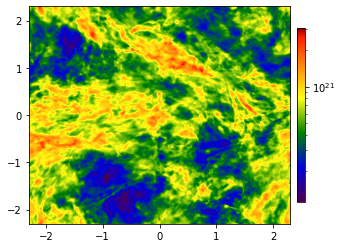

In [12]:
# map of X_CO factor
# co_in_K = np.array(co_lum))*eval('conversion_'+sp1)/L**2
plt.imshow(dens/co, aspect='auto', origin='lower',
           cmap="bds_highcontrast",norm=LogNorm(),
           extent=(-2.3,2.3 ,-2.3 ,2.3 ))
           #vmin=r_a[i][j]/10, vmax=)
cbar = plt.colorbar(shrink=0.8, aspect=20, fraction=.20,pad=.02)
plt.savefig('XCO_factor.png')

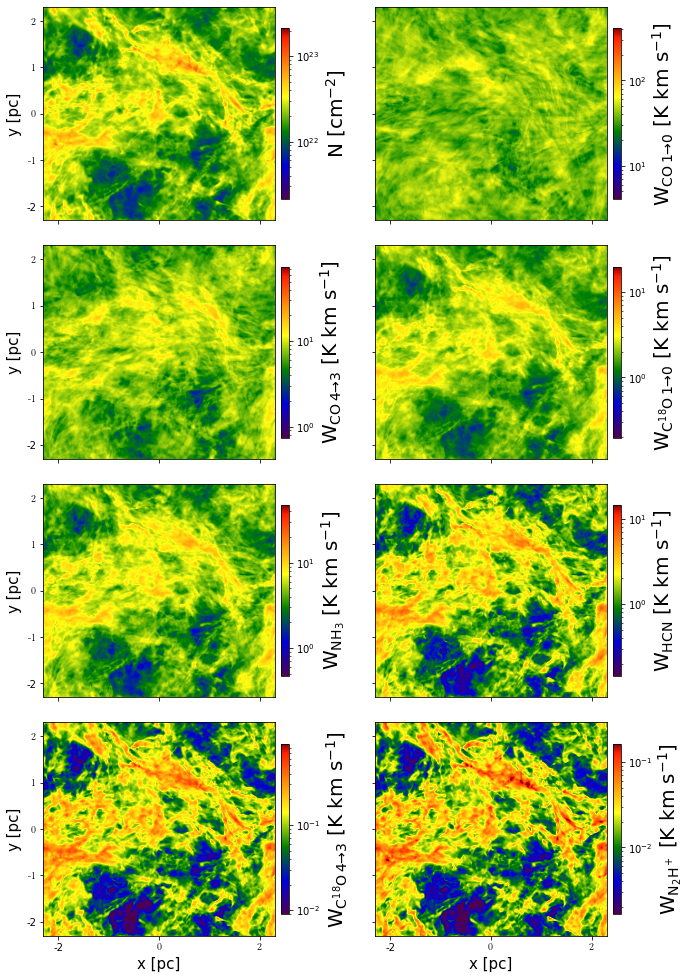

In [13]:
fig, axs = plt.subplots(4, 2, figsize=(10, 14), sharex=True, sharey=True,
                        tight_layout=True)

#CO>CO4-3>C18O>pNH3>HCN>C18O4-3>N2H+
plot_content = [[dens, co],
                [co_4_3, c18o],
                [pnh3, hcn],
                [c18o_4_3, n2h]]
cb_l_a = [['', 'CO \\, 1\\to 0 '], 
          ['CO\\, 4\\to 3 ', 'C^{18}O \\, 1\\to 0'], 
          ['NH_3', 'HCN'],
          ['C^{18}O\\, 4\\to 3','N_2H^+']]

r_a  =[[r0,r1],
       [r2,r3],
       [r4,r5],
       [r6,r7]]

row=4
col=2
for i in range(row):
    for j in range(col):
        locals()['p'+str(i)+str(j)] = axs[i][j].imshow(plot_content[i][j], aspect='auto', origin='lower',
           cmap="bds_highcontrast",norm=LogNorm(),
           extent=(-2.3,2.3 ,-2.3 ,2.3 ),
           vmin=r_a[i][j]/10, vmax=r_a[i][j]*10)
        cbar = fig.colorbar(locals()['p'+str(i)+str(j)],shrink=0.8, aspect=20, fraction=.20,pad=.02, ax=axs[i][j])
        if i==0 and j==0:
            cbar.set_label(r'N [cm$^{-2}$]',size=20)
        else:    
            cbar.set_label(r'W$_{\mathrm{%s}}$ [K km s$^{-1}$]'%cb_l_a[i][j],size=20)
        if i==row-1:
            axs[i][j].set_xlabel(r"x [pc]",fontsize=15)
        if j==0:
            axs[i][j].set_ylabel(r"y [pc]",fontsize=15)

    
plt.subplots_adjust(wspace=0, hspace=0)
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size =20)

#plt.savefig('figure/fig1.pdf')

<a id="lum_weigh_dens_dis"></a>
# Luminosity-weighted density distribution
[Back](#contents)

In [21]:
time = '60'
locals()['rhoarray_02_%s'%time] = rhoarray
locals()['massbin_02_%s'%time] = massbin
for i, sp1 in zip(range(len(sp1_a)), sp1_a ):
    locals()['%sbin_02_%s'%(sp1, time)] = eval('%sbin'%sp1)

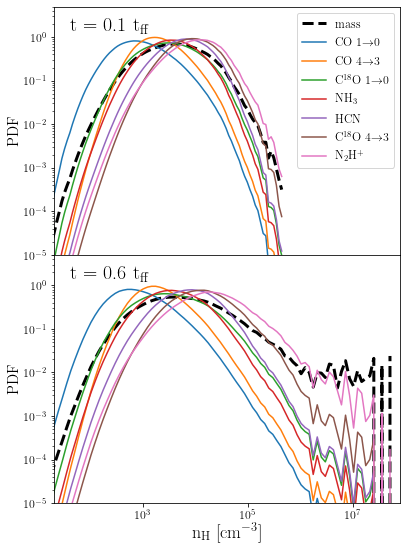

In [23]:
fig, axs = plt.subplots(2, 1, figsize=(6, 8), sharex=True, sharey=True,
                        tight_layout=True,gridspec_kw = {'wspace':0, 'hspace':0})

axs[0].loglog(rhoarray_02_10, massbin_02_10, 'k--',label = 'mass',linewidth='3.0')
axs[1].loglog(rhoarray_02_60, massbin_02_60, 'k--',label = 'mass',linewidth='3.0')

for i, sp1, sp3 in zip(range(len(sp1_a)), sp1_a, sp3_a):
    axs[0].loglog(rhoarray_02_10, locals()['%sbin_02_10'%sp1], label = sp3)
    axs[1].loglog(rhoarray_02_60, locals()['%sbin_02_60'%sp1], label = sp3)
    
axs[0].text(40, 1.2e0, 't = 0.1 t$_{\mathrm{ff}}$', c='black',fontsize=20)
axs[1].text(40, 1.2e0, 't = 0.6 t$_{\mathrm{ff}}$', c='black',fontsize=20)
axs[1].set_xlabel(r"n$_{\rm H}$ [cm$^{-3}$]",fontsize='18')
axs[0].legend(fontsize='12')
plt.axis([2.0e1,8.0e7,1e-5,5])
plt.xticks(fontsize=12)
for ax in axs[:]:
    ax.tick_params(axis="y", labelsize=12)
    ax.set_ylabel(r"PDF",fontsize='15')

plt.rc('text', usetex=True)
plt.rc('font', family='serif',size = 18)
#plt.savefig('figure/Density_Profile.pdf')

<a id="ACF"></a>
# Autocorrelation function
[Back](#contents)

In [13]:
from scipy import stats
dx = 4.6/256
x = dx * (np.arange(256) - 128)          # Get x position in rolled A3 array; here dx is the size of a cell
xxx, yyy, zzz = np.meshgrid(x,x,x)      # Get x, y, z positions of every cell in the A3 array
r = np.sqrt(xxx**2 + yyy**2 + zzz**2)  # Get radial distance of every point in the A3 array
_, r_bins, _ = stats.binned_statistic(np.ravel(r), np.ravel(r), bins=224)    # Compute mean value of A3_nor in bins of radius
lag = 0.5 * (r_bins[1:] + r_bins[:-1])

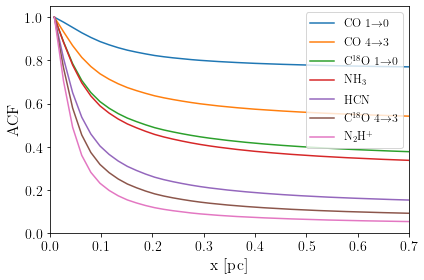

In [79]:
#1D auto_cor 
beta='0.2'
time='10'

for sp1, sp2, sp3 in zip(sp1_a, sp2_a, sp3_a):
    locals()['A1_'+sp2] = np.loadtxt("%s/ACF/beta%s_%s/A1_%s.txt"%(directory,beta,time,sp2))
    plt.plot(lag, locals()['A1_'+sp2], label=sp3)

plt.axis([0, 0.7, 0.0,1.05])
plt.xlabel(r'x [pc]', size=16); plt.ylabel('ACF', size=16); plt.legend(loc = 'upper right',fontsize = 12)
plt.tick_params(axis="x", labelsize=14); plt.tick_params(axis="y", labelsize=14)
plt.rc('text', usetex=True);plt.rc('font', family='serif')
plt.tight_layout()
plt.savefig('figure/fig3.pdf')